In [7]:
#import resourse ciao
from os.path import dirname, join as pjoin
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from time import sleep
import scipy.io as sio
from PIL import Image
import numpy as np
import sys
import os
from numpy import zeros, newaxis
import pickle


#directory
ROOT_DIR = os.path.dirname(os.path.abspath("main.ipynb"))

# print(ROOT_DIRROOT_DIRROOT_DIRROOT_DIR) #root directory


In [8]:
#FUNCTIONS

#PROGRES BAR
def ProgressBar(i,max,postText):
    n_bar =10 #size of progress bar
    j= i/max
    sys.stdout.write('\r')
    sys.stdout.write(f"[{'=' * int(n_bar * j):{n_bar}s}] {int(100 * j)}%  {postText}")
    sys.stdout.flush()
#SHOW IMAGE
def imshow(I,title=None):
    """ display an image with a specific size """
    plt.figure(figsize=(10,10), dpi=80)
#     plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

#DISPLAY DOT
def displaycorners(image,corners):
    plt.imshow(image)
    x = corners[:,0]
    y = corners[:,1]
    plt.scatter(x,y, c='r', s=10)
    plt.show()

#CREATE HEAT IMAGE
def createHeatMap(dist,heads,data):
    shape=(data.shape[0],data.shape[1])
    image=np.zeros(shape)
    #for k in range(0,len(heads)):#originale 
    for k in range(0,len(heads)):
        sigma=dist[k]*0.3
        mux=int(heads[k][0])
        muy=int(heads[k][1])
        n2 = np.int(3*sigma)
        x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
        kern = (1/sigma*np.sqrt(2*np.pi))*np.exp(-(x**2+y**2)/(2*sigma*sigma))
        kern=kern/kern.sum()
        for cord_x in range(-n2+mux,n2+1+mux):
            for cord_y in range(-n2+muy,n2+1+muy):
                if(cord_x>0 and cord_x<image.shape[1] and cord_y>0 and cord_y<image.shape[0]):
                    image[cord_y][cord_x]+=kern[+n2+cord_x-mux][+n2+cord_y-muy]
    # return normalizeImage(image,np.min(image),np.max(image))
    return image

#NORMALIZE IMAGE
def normalizeImage(I,k1,k2):
    newArray = []
    for rows in I:
        row = []
        for pixel in rows:
            row.append(float((255/(k2-k1))*(pixel-k1))/255)
        newArray.append(row)
    return np.array(newArray)

#NORMALIZE IMAGE COLOR
def normalizeImage3Color(I,k1,k2):
    image= np.array(I)
    image[:,:,:] = ((255/(k2-k1))*(image[:,:,:]-k1))
    return I

#COMPUTE HISTOGRAM
def computeHistogram(I):
    newArray = []
    for value in range(255):
        newArray.append((value == I).sum())
    return np.array(newArray)
#CROP IMAGE
def crop(I,width,height):
    x,y,*z =I.shape
    image= I[int(x/2-width/2):int(x/2+width/2), int(y/2-height/2):int(y/2+height/2)]
    return image
def MultipleCrop(I,width,height):
    x,y,z =I.shape
    images=[]
    # images.append(I[int(x/2-width/2):int(x/2+width/2), int(y/2-height/2):int(y/2+height/2)])
    numberImageRow=int(x/width)
    numberImageColumn=int(y/height)
    for i in range(0,numberImageColumn):
        for j in range(0,numberImageRow):
            images.append(I[int(j*width):int(j*width+width), int(i*height):int(i*height+height)])
            # print("append"+str(i)+"i"+str(j)+"j")
        # images.append(I[int(x-width):int(x), int(y-height):int(y)])
    # print("last")
    return images
#INTEGRATION
# def Integration(I):
#     summ=0
#     for value in range(255):
#         newArray.append((value).sum())
#     return np.array(newArray)

In [38]:
#creo le immagini
# empty_list=[]
# open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\heatmaps.pkl','w').close
#     pickle.dump(empty_list,f)
# f.close()

path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\Train\\")#directory
 #valori dataset
 #pictures
mappa=[]
dataset_images_permanent=[]
NumberofImage=1202 #1202
#LOAD DATASET
# for imm in range(1,1202):               #all data
for imm in range(1000,NumberofImage):        #test
    ProgressBar(imm,NumberofImage,"heatmap create")
    num=""
    if imm<10:
        num='000'+str(imm)
    elif imm<100:
        num="00"+str(imm)
    elif imm<1000 :
        num="0"+str(imm)
    else:
        num=imm
    dataname= 'img_'+str(num)+'_ann.mat'
    imagename= 'img_'+str(num)+'.jpg'
    heatmapname= 'heatmap_'+str(num)+'.pkl'
    mat_fname = pjoin(path_dataset, dataname)
    mat_contents = sio.loadmat(mat_fname)
    dataset_values = mat_contents
    dataset_images = np.array(Image.open(path_dataset+imagename))
    dataset_images_permanent.append(dataset_images)
    #display head position
    corner=np.array(dataset_values['annPoints'])
    # print(corner)
    corner_shape=corner.shape
    # print(corner_shape)

    # print(corner_shape[0])
    # displaycorners(dataset_images,dataset_values['annPoints'])
    #5 HEAD MORE CLOSER AND CALCULATE AVERAGE DISTANCE
    dist = np.zeros((corner_shape[0],corner_shape[0]))
    for i in range(0,corner_shape[0]):
       for j in range(0,corner_shape[0]):
            dist[i][j] = np.linalg.norm(corner[i]-corner[j])
    distance = []
    for k in range(0,corner_shape[0]):
      distance.append(np.sum(np.sort(dist[k])[2:8])/6)

    #heatmap1 = Image.fromarray((createHeatMap(distance,corner,dataset_images)))# create heatmap
    t=(createHeatMap(distance,corner,dataset_images))# create heatmap
    # print(t)
    # imshow(t)
    # print(np.sum(t))
    # print("somma")
    #saving obj
    save_path= pjoin('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\', heatmapname)
    with open(save_path,'ab') as f:
        pickle.dump(t,f)
    # with open('objs.pkl','wb') as f:
    #     pickle.dump(t,f)
    # mappa.append(t)
    # heatmap1 = Image.fromarray((t))
    # # print(heatmap1)
    # # imshow(heatmap1)

    # plt.imsave(save_path, heatmap1)
    #cmap="Greyscale" something like this
    del distance,corner,t

# print(mat_contents)
# sorted(mat_contents.keys())
# print(mat_contents['annPoints'])
# print(dataset_values[0]['annPoints'])
# print(dataset_values[1]['annPoints']) #first image data
# print(dataset_images[1]) #first image data




# plt.plot(computeHistogram(dataset_images))
# plt.show()
ProgressBar(NumberofImage,NumberofImage,"heatmap create")


[========  ] 83%  heatmap create

OSError: [Errno 28] No space left on device

In [11]:
# print(dataset_images_permanent[0])

In [132]:

# with open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\primaimmagine.pkl','ab') as f:
#         pickle.dump(dataset_images_permanent[0],f)
# # with open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\primaimmagine.pkl','wb') as f:
#         pickle.dump(dataset_images_permanent[0],f)
# # read obj
# result=[]
# with open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\primaimmagine.pkl','rb') as f:
#     while 1:
#         try:
#             result.append(pickle.load(f))
#         except EOFError:
#             break 

# # with open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\primaimmagine.pkl','rb') as f:
# #     result=pickle.load(f)
# print(len(result))
# imshow(result[0])
# imshow(result[1])

In [12]:
#Carico le immagini
path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\Train\\")#directory
# mappa=[]
dataset_images_permanent = []
dataset_heatmap_permanent = []
w=1000
h=1000
NumberofImagetoLoad=16 #1202
NumberValidImage=0
currentImage=0
with open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\heatmaps.pkl','rb') as f:
    while 1:
        try:
            dataset_heatmap=(pickle.load(f))
            currentImage+=1
            ProgressBar(currentImage,NumberofImagetoLoad,"lettura dati immagini valide:"+ str(NumberValidImage)+" current image:"+str(currentImage))
            # imshow(dataset_heatmap)
            # break
            x,y =np.array(dataset_heatmap).shape
            # print(np.array(dataset_heatmap).shape)
            # break
            if(x>=w and y>=h):
                NumberValidImage+=1
                num=""
                if currentImage<10:
                    num='000'+str(currentImage)
                elif currentImage<100:
                    num="00"+str(currentImage)
                elif currentImage<1000 :
                    num="0"+str(currentImage)
                else:
                    num=currentImage
                imagename= 'img_'+str(num)+'.jpg'
                heatmapname= 'heatmap_'+str(num)+'.jpg'
                save_path= pjoin(ROOT_DIR + '\\dataset\\UCF-QNRF_ECCV18\\heatmap\\', heatmapname)
                # endoffile=False
                dataset_images = np.array(Image.open(path_dataset+imagename))
            # if(x>=w and y>=h):
                dataset_images_permanent.append(dataset_images/255)
        # dataset_heatmap = np.array(Image.open(save_path))
                dataset_heatmap_permanent.append(dataset_heatmap)
                del dataset_images,dataset_heatmap
        except EOFError:
            break
ProgressBar(currentImage,NumberofImagetoLoad,"lettura dati "+ str(NumberValidImage))
for i in range(0,NumberValidImage):
    dataset_heatmap_permanent[i]=np.expand_dims(dataset_heatmap_permanent[i], axis=2)

#LOAD DATASET
# for imm in range(1,1202):               #all data
# for imm in range(1,NumberofImagetoLoad):        #test
#     ProgressBar(imm,NumberofImagetoLoad,"lettura dati "+ str(NumberValidImage))
#     num=""
#     if imm<10:
#         num='000'+str(imm)
#     elif imm<100:
#         num="00"+str(imm)
#     elif imm<1000 :
#         num="0"+str(imm)
#     else:
#         num=imm
#     imagename= 'img_'+str(num)+'.jpg'
#     heatmapname= 'heatmap_'+str(num)+'.jpg'
#     save_path= pjoin(ROOT_DIR + '\\dataset\\UCF-QNRF_ECCV18\\heatmap\\', heatmapname)
#     endoffile=false
#     dataset_images = np.array(Image.open(path_dataset+imagename))
#     x,y,z =dataset_images.shape
#     with open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\heatmaps.pkl','rb') as f:
#         try:
#             dataset_heatmap=pickle.load(f)
#         except EOFError:
#             endoffile=true
#     if(x>=w and y>=h):
        # with open('dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\primaimmagine.pkl','rb') as f:
        #     while 1:
        #         try:
        #             dataset_heatmap=pickle.load(f)
        #             if(x>=w and y>=h):
        #         except EOFError:
        #             break 
    #     dataset_images_permanent.append(dataset_images)
    #     # dataset_heatmap = np.array(Image.open(save_path))
    #     dataset_heatmap_permanent.append(dataset_heatmap)
    #     NumberValidImage+=1
    # del dataset_images,dataset_images
    
    #5 HEAD MORE CLOSER AND CAer,dataset_images))# create heatmap
# del dataset_images,dataset_heatmap
ProgressBar(1,1,"finito")



[==========] 100%  finito

In [13]:
# print(mappa)
# dataset_images_permanent=np.array(dataset_images_permanent)
# del tmp
# ma=np.array(mappa)
# print(dataset_images_permanent.shape)
# dataset_images_permanent
dataset_images_permanent=np.array(dataset_images_permanent)
dataset_heatmap_permanent=np.array(dataset_heatmap_permanent)
tmpp=[]
dat=[]
# for a in range(0,10):
#     print(ma[a].shape)
NumberRealImage=13
for a in range(0,NumberRealImage):
    ProgressBar(a,NumberRealImage,"tmpp")
    # x,y,z =dataset_heatmap_permanent[a].shape
    tmpp.append(crop(np.array(dataset_heatmap_permanent[a]).astype("float32"),w,h))
    # tmpp.extend(MultipleCrop(np.array(dataset_heatmap_permanent[a]).astype("float32"),w,h))  DA ATTIVARE


    # print(a)
del dataset_heatmap_permanent
for b in range(0,NumberRealImage):
    ProgressBar(b,NumberRealImage,"dat")
    dat.append(crop(np.array(dataset_images_permanent[b]).astype("float32"),w,h))
    # dat.extend(MultipleCrop(np.array(dataset_images_permanent[b]).astype("float32"),w,h))  DA ATTIVARE

#     dat.append(crop(np.array(dataset_images_permanent[b]).astype("float32"),384,512))
del dataset_images_permanent

ProgressBar(NumberValidImage,NumberValidImage,"finito")


[=         ] 15%  tmppC:\Users\sebac\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
C:\Users\sebac\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
[==========] 100%  finito

In [130]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D,Convolution2D,UpSampling2D,Conv2DTranspose,BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras import initializers

# inputs = keras.Input(shape=(NumberofImagetoLoad-1,))

#input data
# train= keras.Input(shape=(None, None, 3))
#  we expect our inputs to be RGB images of arbitrary size


#create model
model=Sequential([
    #encoder
Convolution2D(36,(9,9),input_shape=(None,None,3), padding="same", activation="relu",kernel_initializer=initializers.random_normal( stddev=0.01)),

MaxPool2D(pool_size=(2,2), strides=(2,2),padding="same"),

Convolution2D(72,(7,7), padding="same", activation="relu",kernel_initializer=initializers.random_normal(stddev=0.01)),

MaxPool2D(pool_size=(2, 2),strides=(2,2)),

Convolution2D(36,(7,7), padding="same", activation="relu"),#kernel_initializer=initializers.random_normal(stddev=0.01)),

Convolution2D(24,(7,7), padding="same", activation="relu"),#kernel_initializer=initializers.random_normal(stddev=0.01)),

Convolution2D(16,(7,7), padding="same", activation="relu"),#kernel_initializer=initializers.random_normal(stddev=0.01)),

Convolution2D(1,(1,1), padding="same", activation="relu"),#kernel_initializer=initializers.random_normal(stddev=0.01)),

# UpSampling2D((2, 2)),

# UpSampling2D((2, 2)),
Conv2DTranspose(1,    kernel_size=(4,4),  strides=(4,4), use_bias=False )


#decoder
# Convolution2D(1,(1,1), padding="same", activation="relu"),
# Convolution2D(16,(7,7), activation='relu', padding='same'),
# Convolution2D(24,(7,7), activation='relu', padding='same'),

# Convolution2D(36,(7,7), activation='relu', padding='same'),

# UpSampling2D((2, 2)),

# Convolution2D(72,(7,7), activation='relu', padding='same'),

# UpSampling2D((2, 2)),
# Convolution2D(36,(9,9), activation='relu', padding='same'),
# Convolution2D(1, (3, 3), activation='sigmoid', padding='same')
])

#add model layers
model.summary()
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]
# # x_tensor = tf.convert_to_tensor(dataset_images_permanent, dtype=tf.int64) 
# x_tensor = tf.keras.preprocessing.image.array_to_img(dataset_images_permanent)
# # x = np.asarray(x).astype('float32')
# y = model(x_tensor)
# print("Number of weights after calling the model:", len(model.weights))  # 6
# model = keras.Model(inputs=inputs, outputs=outputs)
# model.summary()
# categorical_crossentropy
# loss_function=keras.losses.MeanSquaredError(reduction='auto')
loss_function=keras.losses.MeanAbsoluteError(reduction='auto')
import keras.backend as K
def my_loss(y_true, y_pred):
#    """(sum([(t-p)**2 for t,p in zip(y_true, y_pred)])/n_nonzero)**0.5"""
    return K.sqrt(K.sum(K.square(y_pred*K.cast(y_true>0, "float32") - y_pred), axis=-1) / K.sum(K.cast(y_true>0, "float32")))
from keras.optimizers import SGD
opt=SGD(learning_rate=0.001, momentum=0.9, decay=0.0005 , nesterov= True)
def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

# model.compile(optimizer='adam', loss=custom_loss_function)
model.compile(loss=loss_function, optimizer=opt, metrics= 'accuracy' )




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, None, None, 36)    8784      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, None, None, 36)    0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, None, None, 72)    127080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, None, None, 72)    0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, None, None, 36)    127044    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, None, None, 24)    42360     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, None, None, 16)   

In [ ]:
# #DATA GENERATOR

# class DataGenerator(keras.utils.Sequence):
#     'Generates data for Keras'
#     def __init__(self, list_IDs, labels, batch_size=1, dim=(1000,1000,3), n_channels=1,
#                  n_classes=1, shuffle=True):
#         'Initialization'
#         self.dim = dim
#         self.batch_size = batch_size
#         self.labels = labels
#         self.list_IDs = list_IDs
#         self.n_channels = n_channels
#         self.n_classes = n_classes
#         self.shuffle = shuffle
#         self.on_epoch_end()

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(np.floor(len(self.list_IDs) / self.batch_size))

#     def __getitem__(self, index):
#         'Generate one batch of data'
#         # Generate indexes of the batch
#         indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

#         # Find list of IDs
#         list_IDs_temp = [self.list_IDs[k] for k in indexes]

#         # Generate data
#         X, y = self.__data_generation(list_IDs_temp)

#         return X, y

#     def on_epoch_end(self):
#         'Updates indexes after each epoch'
#         self.indexes = np.arange(len(self.list_IDs))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

#     def __data_generation(self, list_IDs_temp):
#         'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
#         # Initialization
#         X = np.empty((self.batch_size, *self.dim, self.n_channels))
#         y = np.empty((self.batch_size), dtype=int)

#         # Generate data
#         for i, ID in enumerate(list_IDs_temp):
#             # Store sample
#             X[i,] = np.load('data/' + ID + '.npy')

#             # Store class
#             y[i] = self.labels[ID]

#         return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

# from my_classes import DataGenerator

# # Parameters
# params = {'dim': (1000,1000,3),
#           'batch_size': 1,
#           'n_classes': 1,
#           'n_channels': 1,
#           'shuffle': True}

# # Datasets
# partition = # IDs
# labels = # Labels

# # Generators
# training_generator = DataGenerator(partition['train'], labels, **params)
# validation_generator = DataGenerator(partition['validation'], labels, **params)

# # Design model
# model = Sequential()
# [...] # Architecture
# model.compile()

# # Train model on dataset
# model.fit_generator(generator=training_generator,
#                     validation_data=validation_generator,
#                     use_multiprocessing=True,
#                     workers=6)

In [10]:
def read(path_image,heat,path_dataset):
    save_path= pjoin(path_dataset, path_image)
    with open(save_path,'rb') as f:
        try:
            imag=np.array(pickle.load(f))
            x,y,*z = imag.shape
            # IMAGE.append(dataset_images/255)
            # HEATMAP.append(ima)
            if(heat==False):
                imag=(crop(imag/255,500,500))
            else:
                imag=(crop(np.expand_dims(imag/255, axis=2),500,500))
        except EOFError:
            return 0
        return imag
def readOnly(path_image,path_dataset):
    save_path= pjoin(path_dataset, path_image)
    with open(save_path,'rb') as f:
        try:
            imag=np.array(pickle.load(f))
        except EOFError:
            return 0
        return imag

def write(name,imageToSave,path_dataset):
    save_path= pjoin(path_dataset, name)
    with open(save_path,'ab') as f:
        pickle.dump(imageToSave,f)

def generation_ima(start, end):
    for imm in range(1,1202):        #test
        print(imm)
        # ProgressBar(imm,NumberofImage,"heatmap create")
        path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\Train\\")#directory
        num=""
        if imm<10:
            num='000'+str(imm)
        elif imm<100:
            num="00"+str(imm)
        elif imm<1000 :
            num="0"+str(imm)
        else:
            num=imm
        dataname= 'img_'+str(num)+'_ann.mat'
        imagename= 'img_'+str(num)+'.jpg'
        name = 'img_'+str(num)+'.pkl'
    
        # heatmapname= 'heatmap_'+str(num)+'.pkl'
        # mat_fname = pjoin(path_dataset, dataname)
        # mat_contents = sio.loadmat(mat_fname)
        # dataset_values = mat_contents
        dataset_images = np.array(Image.open(path_dataset+imagename))
        # dataset_images_permanent.append(dataset_images)
        write(name,dataset_images,False)



In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# # initialize the paths to our training and testing CSV files
# TRAIN_CSV = "flowers17_training.csv"
# TEST_CSV = "flowers17_testing.csv"
# # initialize the number of epochs to train for and batch size
# NUM_EPOCHS = 75
# BS = 1
# # initialize the total number of training and testing image
# NUM_TRAIN_IMAGES = 1
# NUM_TEST_IMAGES = 0
def get_number():
    t=NUM_TRAIN_IMAGES
    NUM_TRAIN_IMAGES+=1
    return t 
# def image_generator():
#     #Carico le immagini
#     path_=('G:\\PROGETTO IMAGE\\heatmapencoded\\')#directory
#     # path_heat=('G:\\PROGETTO IMAGE\\heatmapencoded\\heatmaps.pkl')#directory
#     # NumberValidImage+=1
#     # endoffile=False
#     # print(len(read("heatmaps.pkl",True,path_)))
#     # HEATMAP=np.expand_dims(readOnly("heatmaps.pkl",path_), axis=0)
#     # IMAGE=np.expand_dims(readOnly("immmages.pkl",path_) , axis=0)
#     HEATMAP=readOnly("heatmaps.pkl",path_)
#     IMAGE=readOnly("immmages.pkl",path_)
# # NUM_TRAIN_IMAGES += 1
# # NUM_TEST_IMAGES += 1
#     yield (IMAGE, HEATMAP)

# open the training CSV file, then initialize the unique set of class
# labels in the dataset along with the testing labels
# f = open(TRAIN_CSV, "r")
# labels = set()
# testLabels = []
# loop over all rows of the CSV file


# for line in f:
# 	# extract the class label, update the labels list, and increment
# 	# the total number of training images
# 	label = line.strip().split(",")[0]
# 	labels.add(label)
# 	NUM_TRAIN_IMAGES += 1
# # close the training CSV file and open the testing CSV file
# f.close()
# f = open(TEST_CSV, "r")
# # loop over the lines in the testing file
# for line in f:
# 	# extract the class label, update the test labels list, and
# 	# increment the total number of testing images
# 	label = line.strip().split(",")[0]
# 	testLabels.append(label)
# 	NUM_TEST_IMAGES += 1
# # close the testing CSV file
# f.close()
# # create the label binarizer for one-hot encoding labels, then encode
# # the testing labels
# lb = LabelBinarizer()
# lb.fit(list(labels))
# testLabels = lb.transform(testLabels)
# # construct the training image generator for data augmentation
# aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
# 	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
# 	horizontal_flip=True, fill_mode="nearest")
    # initialize both the training and testing image generators
trainGen = image_generator()
# testGen = image_generator()

# # train the network
# print("[INFO] training w/ generator...")
# H = model.fit(
# 	x=trainGen,
# 	steps_per_epoch=NUM_TRAIN_IMAGES // BS,
# 	validation_data=testGen,
# 	validation_steps=NUM_TEST_IMAGES // BS,
# 	epochs=NUM_EPOCHS)
# # re-initialize our testing data generator, this time for evaluating
# testGen = image_generator(TEST_CSV, BS, lb,
# 	mode="eval", aug=None)
# # make predictions on the testing images, finding the index of the
# # label with the corresponding largest predicted probability
# predIdxs = model.predict(x=testGen, steps=(NUM_TEST_IMAGES // BS) + 1)
# predIdxs = np.argmax(predIdxs, axis=1)


# show a nicely formatted classification report
# print("[INFO] evaluating network...")
# print(classification_report(testLabels.argmax(axis=1), predIdxs,
# 	target_names=lb.classes_))
#     N = NUM_EPOCHS
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
# plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
# plt.title("Training Loss and Accuracy on Dataset")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left")
# plt.savefig("plot.png")
# print(trainGen.shape)
# del X,Y
trainGenlist = list(trainGen)

print(np.array(trainGenlist).shape)


(1, 2)


In [177]:
# def image_generator():
#     #Carico le immagini
#     path_=('G:\\PROGETTO IMAGE\\heatmapencoded\\')#directory
#     # while 1:
#     try:
#         # HEATMAP=readOnly("heatmaps.pkl",path_)
#         IMAGE=readOnly("immmages.pkl",path_)
#         print("quante")
#     except EOFError:
#         return
#     yield IMAGE, 
def image_generator():
    while 1:
        #Carico le immagini
        path_=('G:\\PROGETTO IMAGE\\heatmapencoded\\')#directory
        # while 1:
        try:
            HEATMAP=readOnly("heatmaps.pkl",path_)
            IMAGE=readOnly("immmages.pkl",path_)
            # print("quante")
            # print(IMAGE.shape)
            IMAGE=np.expand_dims(IMAGE, axis=0)
            # print(IMAGE.shape)
            HEATMAP=np.expand_dims(HEATMAP, axis=0)
        except EOFError:
            return
        yield IMAGE,HEATMAP
list_of_redo=[8,33,106,168,268,274,293,386,390,409,426,428,432,443,483,523,524,551,592,609,633,641,653,712,717,741,766,774,816,816,832,833,835,836,1000,1006,1025]
def generator_(start,end,n,First):
    while 1:
        if(First):
            n=start
            First=False
        imm=n
        path_dataset=("G:\\PROGETTO IMAGE\\heatmapencoded\\")#directory
        # path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\")#directory
        num=""
        if imm<10:
            num='000'+str(imm)
        elif imm<100:
            num="00"+str(imm)
        elif imm<1000 :
            num="0"+str(imm)
        else:
            num=imm
        imagename= 'img_'+str(num)+'.jpg'
        name = 'img_'+str(num)+'.pkl'
        heatname = 'heatmap_'+str(num)+'.pkl'
        HEATMAP=read(heatname,True,path_dataset)
        IMAGE=read(name,False,path_dataset)
        IMAGE=np.expand_dims(IMAGE, axis=0)
        HEATMAP=np.expand_dims(HEATMAP, axis=0)
        # print(IMAGE.shape)
        # print(HEATMAP.shape)
        while(HEATMAP.shape!=(1, 500, 500, 1) or IMAGE.shape!=(1, 500, 500, 3)or (n in list_of_redo)):
            n+=1
            imm=n
            num=""
            if imm<10:
                num='000'+str(imm)
            elif imm<100:
                num="00"+str(imm)
            elif imm<1000:
                num="0"+str(imm)
            else:
                num=imm
            imagename= 'img_'+str(num)+'.jpg'
            name = 'img_'+str(num)+'.pkl'
            heatname = 'heatmap_'+str(num)+'.pkl'
            HEATMAP=read(heatname,True,path_dataset)
            IMAGE=read(name,False,path_dataset)
            IMAGE=np.expand_dims(IMAGE, axis=0)
            HEATMAP=np.expand_dims(HEATMAP, axis=0)
        n+=1
        if(n==end):
            n=start
        yield IMAGE,HEATMAP
def trovabug():
    for imm in range(1026,1202):        #test
        path_dataset=("G:\\PROGETTO IMAGE\\heatmapencoded\\")#directory
        # path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\")#directory
        num=""
        if imm<10:
            num='000'+str(imm)
        elif imm<100:
            num="00"+str(imm)
        elif imm<1000 :
            num="0"+str(imm)
        else:
            num=imm
        imagename= 'img_'+str(num)+'.jpg'
        name = 'img_'+str(num)+'.pkl'
        heatname = 'heatmap_'+str(num)+'.pkl'
        HEATMAP=read(heatname,True,path_dataset)
        IMAGE=read(name,False,path_dataset)
        IMAGE=np.expand_dims(IMAGE, axis=0)
        HEATMAP=np.expand_dims(HEATMAP, axis=0)
        print(str(num)+ "test")
        if(IMAGE.shape!=(1, 500, 500, 3)):
            print("image "+ str(num))
        if(HEATMAP.shape!=(1, 500, 500, 1)):
            print("heatmap "+ str(num))

def test_(start,end):
    values=[]
    for imm in range(start,start+end):        #test
        path_dataset=("G:\\PROGETTO IMAGE\\heatmapencoded\\")#directory
        # path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\")#directory
        num=""
        if imm<10:
            num='000'+str(imm)
        elif imm<100:
            num="00"+str(imm)
        elif imm<1000 :
            num="0"+str(imm)
        else:
            num=imm
        imagename= 'img_'+str(num)+'.jpg'
        name = 'img_'+str(num)+'.pkl'
        IMAGE=read(name,False,path_dataset)
        IMAGE=np.expand_dims(IMAGE, axis=0)
        # HEATMAP=np.expand_dims(HEATMAP, axis=0)
        # if(imm==start+end):
        #     imm=start
        values.append(IMAGE)
        del IMAGE
    return values
# def test_generator(start,end):
#     open('G:\\PROGETTO IMAGE\\heatmapencoded\\immmagestest.pkl','w').close
#     open('G:\\PROGETTO IMAGE\\heatmapencoded\\heatmapstest.pkl','w').close

    

def test():
    imagename= 'img_'+str(num)+'.jpg'
    p='G:\\PROGETTO IMAGE\\heatmapencoded\\'
    name1 = 'img_0010.pkl'
    name2 = 'img_0011.pkl'
    namesave= 'img_save.pkl'
    heatname = 'heatmap_'+str(num)+'.pkl'
    a=read(name1,False,p)
    b=read(name2,False,p)
    write(namesave,a,p)
    write(namesave,a,p)
    c=readOnly(namesave,p)
    return c

def train_generator(end):
    open('G:\\PROGETTO IMAGE\\heatmapencoded\\immmages.pkl','w').close
    open('G:\\PROGETTO IMAGE\\heatmapencoded\\heatmaps.pkl','w').close

    for imm in range(1,end):        #test
        # print(imm)
        ProgressBar(imm,end,"percentuale")
        # G:\PROGETTO IMAGE\heatmapencoded
        path_dataset=("G:\\PROGETTO IMAGE\\heatmapencoded\\")#directory

        # path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\")#directory
        num=""
        if imm<10:
            num='000'+str(imm)
        elif imm<100:
            num="00"+str(imm)
        elif imm<1000 :
            num="0"+str(imm)
        else:
            num=imm
        # dataname= 'img_'+str(num)+'_ann.mat'
        imagename= 'img_'+str(num)+'.jpg'
        name = 'img_'+str(num)+'.pkl'
        heatname = 'heatmap_'+str(num)+'.pkl'

        write("immmages.pkl",read(name,False,path_dataset),path_dataset)
        write("heatmaps.pkl",read(heatname,True,path_dataset),path_dataset)




In [176]:
# trovabug()

In [ ]:
list_of_redo=[8,33,106,168,268,274,293,386,390,409,426,428,432,443,483,523,524,551,592,609,633,641,653,712,717,741,766,774,816,816,832,833,835,836,1000,1006,1025]

def redo():
    while(list_of_redo!=[]):
        MultipleCrop(read)
        nu=list_of_redo[0]
        ProgressBar(imm,end,"percentuale")
        # G:\PROGETTO IMAGE\heatmapencoded
        path_dataset=("G:\\PROGETTO IMAGE\\heatmapencoded\\")#directory

        # path_dataset=(ROOT_DIR + "\\dataset\\UCF-QNRF_ECCV18\\heatmapencoded\\")#directory
        num=""
        if imm<10:
            num='000'+str(imm)
        elif imm<100:
            num="00"+str(imm)
        elif imm<1000 :
            num="0"+str(imm)
        else:
            num=imm
        # dataname= 'img_'+str(num)+'_ann.mat'
        imagename= 'img_'+str(num)+'.jpg'
        name = 'img_'+str(num)+'.pkl'
        heatname = 'heatmap_'+str(num)+'.pkl'

        write("immmages.pkl",read(name,False,path_dataset),path_dataset)
        write("heatmaps.pkl",read(heatname,True,path_dataset),path_dataset)


In [193]:
train_generator(15)
test_generator(800,15)

[========= ] 99%  percentuale

In [178]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D,Convolution2D,UpSampling2D,Conv2DTranspose,BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from tensorflow.keras import initializers

#create model
model=Sequential([
    #encoder
Convolution2D(36,(9,9),input_shape=(None,None,3), padding="same", activation="relu",kernel_initializer=initializers.random_normal( stddev=0.01)),

MaxPool2D(pool_size=(2,2), strides=(2,2),padding="same"),

Convolution2D(72,(7,7), padding="same", activation="relu",kernel_initializer=initializers.random_normal(stddev=0.01)),

MaxPool2D(pool_size=(2, 2),strides=(2,2)),

Convolution2D(36,(7,7), padding="same", activation="relu",kernel_initializer=initializers.random_normal(stddev=0.01)),

Convolution2D(24,(7,7), padding="same", activation="relu",kernel_initializer=initializers.random_normal(stddev=0.01)),

Convolution2D(16,(7,7), padding="same", activation="relu",kernel_initializer=initializers.random_normal(stddev=0.01)),

Convolution2D(1,(1,1), padding="same", activation="relu",kernel_initializer=initializers.random_normal(stddev=0.01)),

# UpSampling2D((2, 2)),

# UpSampling2D((2, 2)),
Conv2DTranspose(1,    kernel_size=(4,4),  strides=(4,4), use_bias=False )

])

#add model layers
model.summary()
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

loss_function=keras.losses.MeanSquaredError(reduction='auto')
# loss_function=keras.losses.MeanAbsoluteError(reduction='auto')
import keras.backend as K
def my_loss(y_true, y_pred):
#    """(sum([(t-p)**2 for t,p in zip(y_true, y_pred)])/n_nonzero)**0.5"""
    return K.sqrt(K.sum(K.square(y_pred*K.cast(y_true>0, "float32") - y_pred), axis=-1) / K.sum(K.cast(y_true>0, "float32")))
from keras.optimizers import SGD
opt=SGD(learning_rate=0.00001, momentum=0.9, decay=0.0005 , nesterov= True)
def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)

# model.compile(optimizer='adam', loss=custom_loss_function)
model.compile(loss=loss_function, optimizer=opt,metrics=['accuracy'])#)#sample_weight_mode="temporal" )




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, None, None, 36)    8784      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, None, None, 36)    0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, None, None, 72)    127080    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, None, None, 72)    0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, None, None, 36)    127044    
_________________________________________________________________
conv2d_51 (Conv2D)           (None, None, None, 24)    42360     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, None, None, 16)   

In [180]:
tf.config.experimental_run_functions_eagerly(True)
# NUM_TRAIN_IMAGES = 0
# def generator_(start,end,n,First):

trainGen = generator_(1,500,1,True)
valGen = generator_(501,600,501,True)

print("qui ci arrivo")
model.fit(
    x = trainGen,
    validation_data = valGen,
    validation_steps=1,
    batch_size=1,
    steps_per_epoch =1,
    epochs=500,
    verbose=1,
    shuffle=True,
    
   
)
print("finito")

# model.save_weights('cnn.h5')

qui ci arrivo


In [16]:
# for i in range(0,NumberofImagetoLoad):
#     print(dataset_images_permanent[i].shape)
#     print(i)
# imshow(X[45])
1000
1025
765
802
896
501
165
575

In [76]:
# ValueError: `generator` yielded an element of shape (1, 500, 500) where an element of shape (None, None, None, None) was expected.
for i in generator_(1,10,1,True):
    print(np.array(i[0]).shape)
        # print(np.array(i).shape)
    # if(np.array(i[0]).shape)!=(1, 500, 500, 3): print("questa")


# train_generator(15)
# test_generator(800,15)

# trainGen = image_generator()
# # valGen = valid_generator()
# test_generator(200,5)
# # # trainGen = image_generator()
# valGen = valid_generator()

# train_generator(15)
# test_generator(800,15)
# test_generator(200,15)
# reader =valid_generator()

# predizione = list(valGen)
# reader = generator_(200,220)
predic= test_(550,5)
# print(np.array(predict[1]).shape)

(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)
(1, 500, 500, 3)


KeyboardInterrupt: 

In [147]:
# for i in reader:
#     imshow(i[0].reshape(500,500,3))
print(len(test_(435,5)))
a=test_(700,5)
# l=[]
# for y in a:
#     p=y
#     print(y.shape)
#     p=np.squeeze(p, axis=0)
#     print(p.shape)
#     l.append(p) # imshow(a[0].reshape(500,500,3))
# r=[]
# for ni in range(0,5):
#     r.append(a[ni].reshape(500,500,3))
# print(r[0].shape)
    # r.append(i.reshape(500,500,3))

5


In [134]:
# print(l.shape)

In [148]:
predictions = model.predict(a[0])

(1, 500, 500, 1)


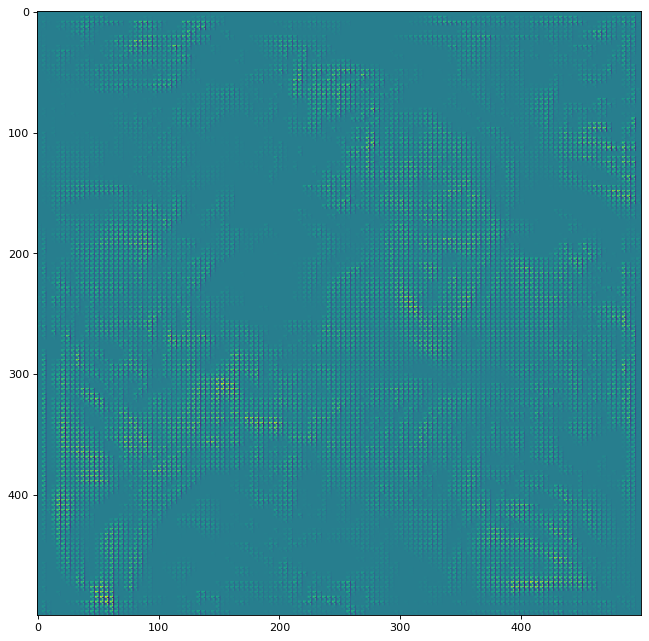

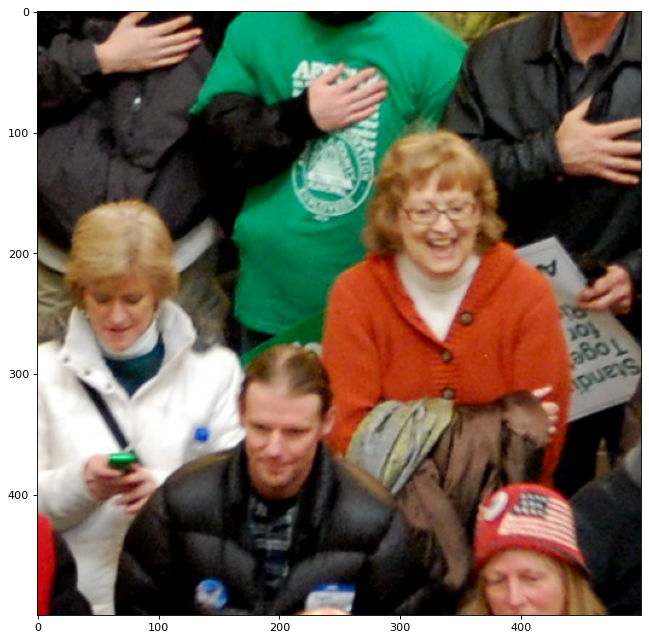

36.09808


In [149]:
print(predictions.shape)
imshow(predictions[0])
imshow(np.squeeze(a[0], axis=0))
# imshow(X[47])
# print(predictions)
print(np.sum(predictions))

# imshow(X[1])
# imshow(Y[47])

# print(len(predictions[predictions!=0]))
# imshow(predictions[predictions!=0])

In [37]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

In [36]:
import time
# time.sleep(5)
duration = 1000  # milliseconds
freq = 440  # Hz
# winsound.Beep(freq, duration)
duration = 500  # milliseconds
freq = 500  # Hz
# winsound.Beep(freq, duration)
duration = 1500  # milliseconds
freq = 480  # Hz
winsound.Beep(freq, duration)
duration = 200  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)
duration = 200  # milliseconds
freq = 500  # Hz
winsound.Beep(freq, duration)
duration = 200  # milliseconds
freq = 480  # Hz
winsound.Beep(freq, duration)
duration = 200  # milliseconds
freq = 480  # Hz
winsound.Beep(freq, duration)

NameError: name 'winsound' is not defined

In [ ]:
# del ma,dataset_images

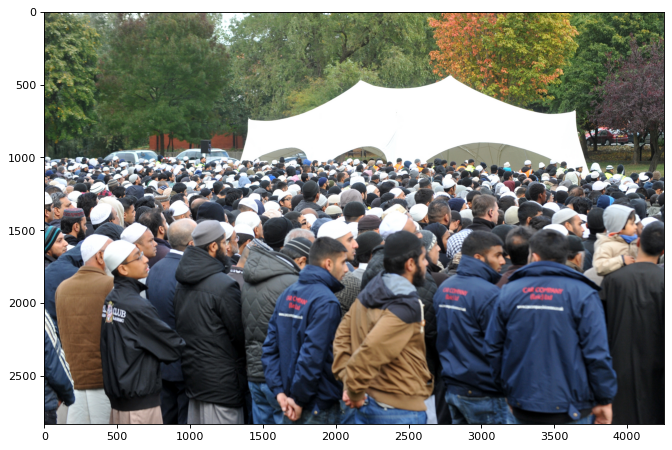

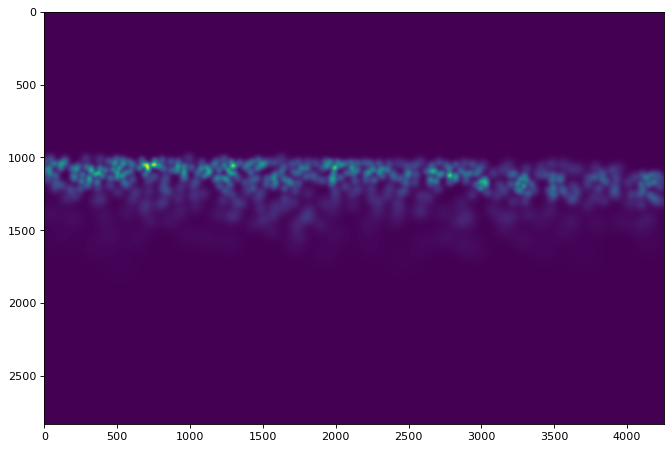

In [163]:
# type(dataset_images_permanent)
# print(dataset_images_permanent)
imshow(dataset_images_permanent[0])
imshow(ma[0])

In [171]:
# print(ma[np.nonzero(ma)])
# print(np.max(ma[0]))
print("maxheatmap")
print(np.sum(ma[0]))
print(dataset_images_permanent)
# print(np.sum(ma[np.nonzero(ma[0])]))

maxheatmap
430.8665639661226


In [178]:
dataset_values['annPoints'].shape


(153, 2)

(153, 2)